# Fraud Detection

# Self Organizing Map

### Importing the libraries

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [224]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

### Feature Scaling

In [225]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1)) #values range i.e. 0-1
X = sc.fit_transform(X)
# all the values will be converted in between 0-1 (normalization)

### Training the SOM

In [226]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
# x,y= dimensions of the grid
# input_len= no. of features in X (i.e. 15)
# sigma= radius of the different neighbourhood in the grid 1.0 is default value
# learning_rate=Decides how much the weights are updated during each iteration higher the rate faster the conversions 
#               0.5 default value
som.random_weights_init(X) # method to initialize the weights
som.train_random(data = X, num_iteration = 100)

### Visualizing the results

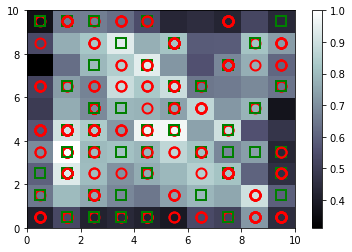

In [227]:
from pylab import bone, pcolor, colorbar, plot, show
bone()  # to initialize the figure/window
pcolor(som.distance_map().T)  # All the values of mean inter-neuron distances in 1 metrix .T to take the transpose
colorbar()  # legend function
markers = ['o', 's']  # o for circle and s for square
colors = ['r', 'g']  # red for not approved green for approved
for i, x in enumerate(X): # to iterate over every customer- i is index of row, x is diffeerent vectors of customers i.e 
#                           vector of row containing index i 
    w = som.winner(x)  # winning node of the customer
    plot(w[0] + 0.5, # add 0.5 to put the marker at the centre of square in grid, w[0]&w[1] are the coordinates of winning 
         w[1] + 0.5, # node
         markers[y[i]], # dependent values of the customer having index i if y=0 then circle 1=square
         markeredgecolor = colors[y[i]], # to colour only edge of the marker
         markerfacecolor = 'None', # to get inside colour of the marker
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the frauds

In [228]:
mappings = som.win_map(X)  # returns the dictionary of all the mappings from winning node to customers
frauds = np.concatenate((mappings[(1,3)], mappings[(5,4)]), axis = 0) # 0 means vertically
# (1,3) & (5,4) are the co-ordinates of points closest to white colour(1) i.e. frauds
frauds = sc.inverse_transform(frauds)

In [229]:
mappings

defaultdict(list,
            {(1,
              9): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
                     0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
                     5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 8.00000000e-02, 4.00000000e-04]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
                     0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
                     0. 

In [234]:
frauds[0:2]

array([[1.5786237e+07, 0.0000000e+00, 1.9170000e+01, 5.8500000e-01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.8500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5590434e+07, 0.0000000e+00, 2.5000000e+01, 8.7500000e-01,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 1.0400000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 5.8610000e+03]])

### Printing the Fraud Clients

In [235]:
a=[]
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))
    a.append(int(i))
print("Total no. of fraud customers :", len(a))

Fraud Customer IDs
15786237
15590434
15767358
15567839
15671014
15579583
15642336
15740487
15593345
15811742
15702571
15622083
15646190
15715907
15768342
15748532
15689692
15672357
15788634
15580914
15664615
15607986
15578722
15569682
15591107
15588854
Total no. of fraud customers : 26
